# Collaboration and Competition

---

In this notebook, we use 2 variations of **Deep Deterministic Policy Gradients (DDPG)** to solve the **Tennis** environment.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

%reload_ext autoreload
%autoreload 2

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe", seed=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0].reshape(3,8))
print('The state for the 2nd agent looks like:', states[1].reshape(3,8))

def print_pos(states):
    for ag in range(len(states)):
        s = states[ag].reshape(3,8)[2]
        print(f"Agent {ag+1}: x = {s[0]:.2}, y = {s[1]:.2} - ball: x = {s[4]:.2}, y = {s[5]:.2}")

print_pos(states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-6.63803244 -1.5        -0.          0.          6.00063038  6.
  -0.          0.        ]]
The state for the 2nd agent looks like: [[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-7.07908773 -1.5         0.          0.         -6.00063038  6.
   0.          0.        ]]
Agent 1: x = -6.6, y = -1.5 - ball: x = 6.0, y = 6.0
Agent 2: x = -7.1, y = -1.5 - ball: x = -6.0, y = 6.0


We can observe that each agent has its own referential and that the state for an agent expresses positions and velocities (of racket and ball) relatively to this referential. In this referential, the x-abscissa is oriented from own racket towards opponent racket and has its origin at the position of the net. Thus, if the ball is seen at position x for agent 1, then the ball is seen at position -x for agent 2. It means also that **one agent can learn from its own experience, but also from experience of its opponent !**

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 2):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        print_pos(states)
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
        
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Agent 1: x = -7.4, y = -1.5 - ball: x = 6.8, y = 6.0
Agent 2: x = -6.7, y = -1.5 - ball: x = -6.8, y = 6.0
Agent 1: x = -4.4, y = -0.98 - ball: x = 6.8, y = 5.9
Agent 2: x = -3.7, y = -0.98 - ball: x = -6.8, y = 5.9
Agent 1: x = -7.4, y = -0.42 - ball: x = 6.8, y = 5.7
Agent 2: x = -1.7, y = -0.42 - ball: x = -6.8, y = 5.7
Agent 1: x = -9.7, y = 0.044 - ball: x = 6.8, y = 5.5
Agent 2: x = -2.2, y = 0.044 - ball: x = -6.8, y = 5.5
Agent 1: x = -1.1e+01, y = 0.41 - ball: x = 6.8, y = 5.1
Agent 2: x = -0.67, y = 0.41 - ball: x = -6.8, y = 5.1
Agent 1: x = -1.1e+01, y = 0.68 - ball: x = 6.8, y = 4.6
Agent 2: x = -0.95, y = 0.68 - ball: x = -6.8, y = 4.6
Agent 1: x = -7.9, y = 0.85 - ball: x = 6.8, y = 4.1
Agent 2: x = -0.89, y = 0.85 - ball: x = -6.8, y = 4.1
Agent 1: x = -7.5, y = 0.92 - ball: x = 6.8, y = 3.4
Agent 2: x = -0.62, y = 0.92 - ball: x = -6.8, y = 3.4
Agent 1: x = -4.5, y = 0.9 - ball: x = 6.8, y = 2.6
Agent 2: x = -0.89, y = 0.9 - ball: x = -6.8, y = 2.6
Agent 1: x = -3.8, y

When finished, you can close the environment.

In [7]:
env.close()

### 4. Solution 1: independent agents

Here, we use 2 completely independent DDPG agents to solve the environment. Each agent has its own actor, its own critic and its own replay buffer.


In [5]:

from ddpg_agent import DDPG
import torch
from collections import deque
from utils import plot_scores
import matplotlib.pyplot as plt
%matplotlib inline

device forced: cpu


In [7]:
def train_2_ddpg(n_episodes=3000, max_t=1000, noise_init=1.0, noise_decay=1.0):
    scores_deque = deque(maxlen=100)
    scores=[]
    scores0=[]
    scores1=[]
    diff_scores=[]
    noise = noise_init
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent0.reset()
        agent1.reset()
        scores_agents = np.zeros(num_agents)
        for t in range(max_t):
            s0 = states[0].reshape(1,-1)
            s1 = states[1].reshape(1,-1)
            action0 = agent0.act(s0, noise)                        # select actions
            action1 = agent1.act(s1, noise)
            env_info = env.step([action0,action1])[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores_agents += rewards                         # update the score (for each agent)
            
            agent0.step(s0, action0, [rewards[0]], next_states[0].reshape(1,-1), [dones[0]])
            agent1.step(s1, action1, [rewards[1]], next_states[1].reshape(1,-1), [dones[1]])
            states = next_states                               # roll over states to next time step
            if np.any(dones):
                break 
        
        scores0.append(scores_agents[0])
        scores1.append(scores_agents[1])
        diff_scores.append(scores_agents[0]-scores_agents[1])
        current_score = np.max(scores_agents)
        scores_deque.append(current_score)
        scores.append(current_score)
        scores_avg_100 = np.mean(scores_deque)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode,scores_avg_100, current_score), end="")
        if i_episode % 100 == 0 or scores_avg_100 >= 0.5:
            torch.save(agent0.actor_local.state_dict(), 'checkpoint_actor_0.pth')
            torch.save(agent0.critic_local.state_dict(), 'checkpoint_critic_0.pth')
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            print('\rEpisode {}\tAverage Score: {:.2f} - noise: {:.2f}'.format(i_episode, scores_avg_100, noise)) 
        if scores_avg_100 >= 0.5 and i_episode >= 100:
            print("Environment solved in {} episodes !!!".format(i_episode-100))
            break
        noise = noise * noise_decay
    plot_scores(scores0, title="Scores agent 1")
    plot_scores(scores1, title="Scores agent 2")
    plot_scores(diff_scores, title="Score agent 1 - score agent 2")
    plot_scores(scores, title="Solved in {} episodes".format(i_episode-100))
    return scores


Episode 100	Average Score: 0.01 - noise: 0.91
Episode 200	Average Score: 0.01 - noise: 0.82
Episode 300	Average Score: 0.01 - noise: 0.74
Episode 400	Average Score: 0.02 - noise: 0.67
Episode 500	Average Score: 0.01 - noise: 0.61
Episode 600	Average Score: 0.00 - noise: 0.55
Episode 700	Average Score: 0.01 - noise: 0.50
Episode 800	Average Score: 0.02 - noise: 0.45
Episode 900	Average Score: 0.03 - noise: 0.41
Episode 1000	Average Score: 0.11 - noise: 0.37
Episode 1100	Average Score: 0.12 - noise: 0.33
Episode 1200	Average Score: 0.12 - noise: 0.30
Episode 1300	Average Score: 0.14 - noise: 0.27
Episode 1400	Average Score: 0.11 - noise: 0.25
Episode 1500	Average Score: 0.12 - noise: 0.22
Episode 1600	Average Score: 0.41 - noise: 0.20
Episode 1609	Average Score: 0.51 - noise: 0.20
Environment solved in 1509 episodes !!!


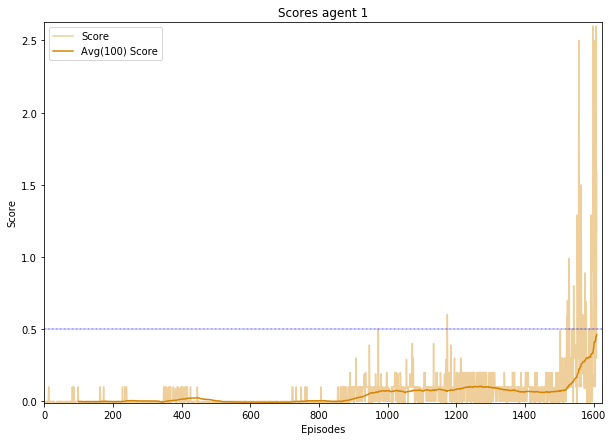

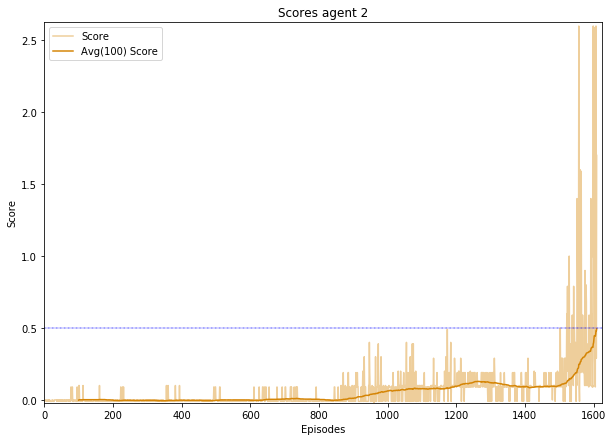

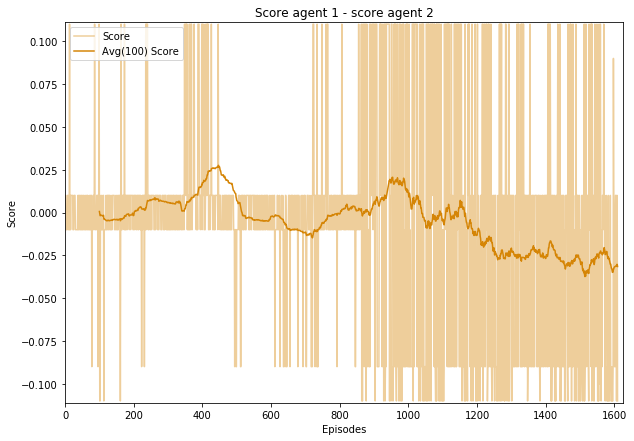

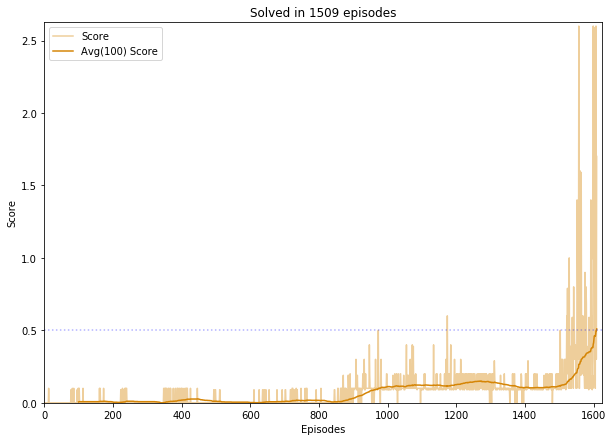

In [7]:
params={"buffer_size":int(1e5), "batch_size":128, "gamma":0.99, "tau":1e-3, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent0 = DDPG(state_size=state_size, action_size=action_size, num_agents=1, random_seed=1, **params)
agent1 = DDPG(state_size=state_size, action_size=action_size, num_agents=1, random_seed=1, **params)
scores = train_2_ddpg(3000, noise_init=1.0, noise_decay=0.999)

### Watch the match
In the next code cell, we load the trained weights from files to watch a match between the 2 agents!

In [38]:
agent0 = DDPG(state_size=state_size, action_size=action_size, num_agents=1, random_seed=2, use_batch_norm=True)
agent0.actor_local.load_state_dict(torch.load('checkpoint_actor_0.pth'))
agent0.critic_local.load_state_dict(torch.load('checkpoint_critic_0.pth'))
agent1 = DDPG(state_size=state_size, action_size=action_size, num_agents=1, random_seed=2, use_batch_norm=True)
agent1.actor_local.load_state_dict(torch.load('checkpoint_actor_1.pth'))
agent1.critic_local.load_state_dict(torch.load('checkpoint_critic_1.pth'))

env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
for t in range(400):
    s0 = states[0].reshape(1,-1)
    s1 = states[1].reshape(1,-1)
    action0 = agent0.act(s0, noise=0)                        # select actions
    action1 = agent1.act(s1, noise=0)
    env_info = env.step([action0,action1])[brain_name]
    states = env_info.vector_observations
    dones = env_info.local_done                        # see if episode finished
    # rewards = env_info.rewards
    
    if np.any(dones):
        break 

### 5. Solution 2: distributed agents

Here,  the 2 agents shared the networks (only one local actor, one target actor, one local critic, one target critic) and the replay buffer. Actually, we use exactly the same architecture and code as in the project [Continuous Control](../p2_continuous-control).


In [6]:
def train_ddpg(n_episodes=3000, max_t=1000, noise_init=1.0, noise_decay=1.0, noise_cycle=(1,0), stop_when_solved=True):
    scores_deque = deque(maxlen=100)
    scores=[]
    noise = noise_init
    is_noise_active = True
    already_solved = False
    max_avg_scores = 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores_agents = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states, noise)                        # select actions
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores_agents += rewards                         # update the score (for each agent)
            
            agent.step(states, actions, rewards, next_states, dones)

            states = next_states                               # roll over states to next time step
            if np.any(dones):
                break 
        current_score = np.max(scores_agents)
        scores_deque.append(current_score)
        scores.append(current_score)
        scores_avg_100 = np.mean(scores_deque)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode,scores_avg_100, current_score), end="")
        if i_episode % 100 == 0:
            
            print('\rEpisode {}\tAverage Score: {:.2f} - noise: {:.2f}'.format(i_episode, scores_avg_100, noise)) 
        if scores_avg_100 > max_avg_scores:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            max_avg_scores = scores_avg_100
        if not already_solved and scores_avg_100 >= 0.5 and i_episode >= 100:
            print("\nEnvironment solved in {} episodes !!!".format(i_episode-100))
            episode_solved = i_episode
            already_solved = True
            if stop_when_solved: break
        if i_episode % (noise_cycle[0]+noise_cycle[1]) < noise_cycle[0]:
            if not is_noise_active:
                noise = noise_init
                is_noise_active = True
            noise = noise * noise_decay
        else:
            if is_noise_active:
                noise = 0
                is_noise_active = False
    plot_scores(scores, title="Solved in {} episodes".format(episode_solved-100))
    return scores


Episode 100	Average Score: 0.02 - noise: 0.91
Episode 200	Average Score: 0.00 - noise: 0.82
Episode 300	Average Score: 0.00 - noise: 0.74
Episode 400	Average Score: 0.01 - noise: 0.67
Episode 500	Average Score: 0.02 - noise: 0.61
Episode 600	Average Score: 0.00 - noise: 0.55
Episode 700	Average Score: 0.01 - noise: 0.50
Episode 800	Average Score: 0.06 - noise: 0.45
Episode 900	Average Score: 0.06 - noise: 0.41
Episode 1000	Average Score: 0.08 - noise: 0.37
Episode 1100	Average Score: 0.09 - noise: 0.33
Episode 1200	Average Score: 0.34 - noise: 0.30
Episode 1216	Average Score: 0.51 - noise: 0.30
Environment solved in 1116 episodes !!!


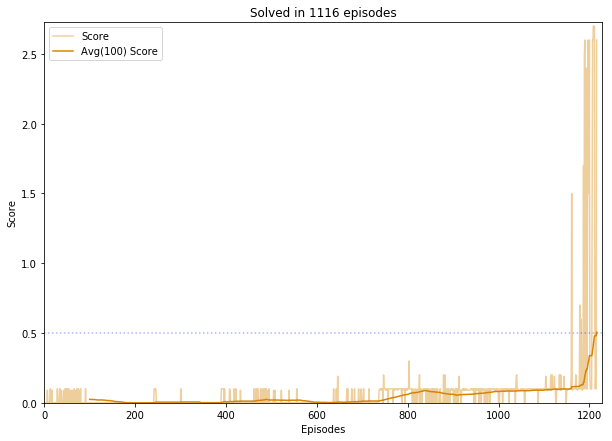

In [7]:
params={"buffer_size":int(1e5), "batch_size":128, "gamma":0.99, "tau":1e-3, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent = DDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1, **params)
scores = train_ddpg(3000, noise_init=1.0, noise_decay=0.999)

### Impact of tau
 - tau = 1e-3

Episode 100	Average Score: 0.01 - noise: 0.55
Episode 200	Average Score: 0.05 - noise: 0.30
Episode 300	Average Score: 0.00 - noise: 0.17
Episode 400	Average Score: 0.00 - noise: 0.09
Episode 500	Average Score: 0.06 - noise: 0.05
Episode 600	Average Score: 0.05 - noise: 0.03
Episode 700	Average Score: 0.13 - noise: 0.01
Episode 800	Average Score: 0.17 - noise: 0.01
Episode 840	Average Score: 0.51	Score: 2.60
Environment solved in 740 episodes !!!


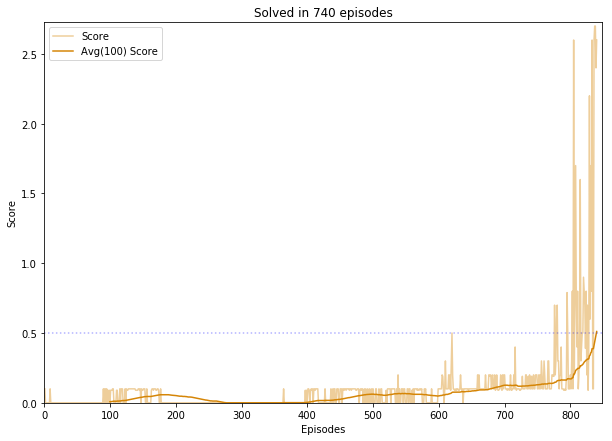

In [8]:
params={"buffer_size":int(1e5), "batch_size":512, "gamma":0.99, "tau":1e-3, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent = DDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1, **params)
scores = train_ddpg(1500, noise_init=1.0, noise_decay=0.994)

 - tau = 1e-2

Episode 100	Average Score: 0.01 - noise: 0.55
Episode 200	Average Score: 0.03 - noise: 0.30
Episode 300	Average Score: 0.05 - noise: 0.17
Episode 400	Average Score: 0.17 - noise: 0.09
Episode 453	Average Score: 0.51	Score: 1.10
Environment solved in 353 episodes !!!


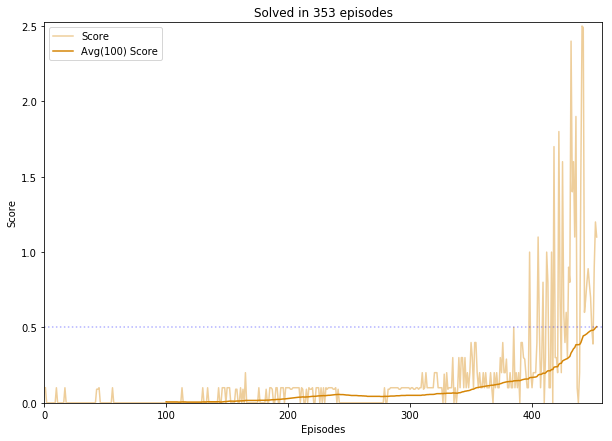

In [10]:
params={"buffer_size":int(1e5), "batch_size":512, "gamma":0.99, "tau":1e-2, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent = DDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1, **params)
scores = train_ddpg(1100, noise_init=1.0, noise_decay=0.994)

 - tau = 1e-1

Episode 100	Average Score: 0.05 - noise: 0.55
Episode 200	Average Score: 0.39 - noise: 0.30
Episode 215	Average Score: 0.52	Score: 2.70
Environment solved in 115 episodes !!!


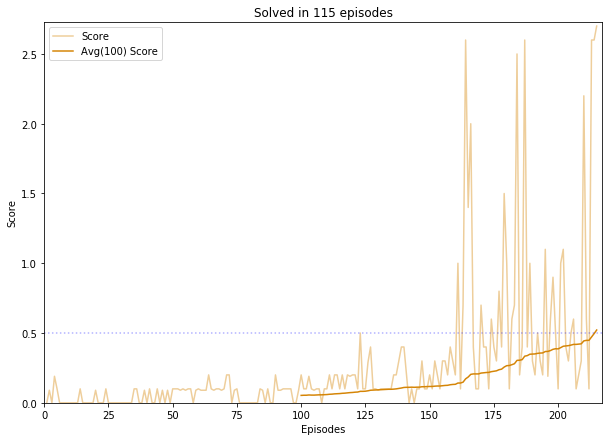

In [13]:
params={"buffer_size":int(1e5), "batch_size":512, "gamma":0.99, "tau":1e-1, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent = DDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1, **params)
scores = train_ddpg(1100, noise_init=1.0, noise_decay=0.994)

 - tau = 2e-1

Episode 100	Average Score: 0.19 - noise: 0.55
Episode 145	Average Score: 0.52	Score: 2.60
Environment solved in 45 episodes !!!


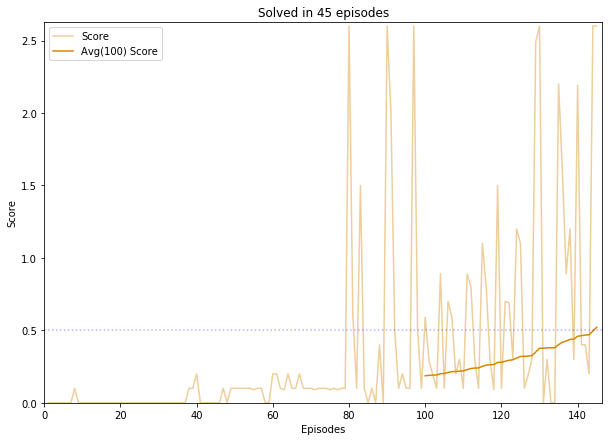

In [7]:
params={"buffer_size":int(1e5), "batch_size":512, "gamma":0.99, "tau":2e-1, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent = DDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1, **params)
scores = train_ddpg(1100, noise_init=1.0, noise_decay=0.994)

**Let the training continue after the environment is solved**

- 2000 episodes with tau = 1e-3

Episode 100	Average Score: 0.00 - noise: 0.91
Episode 200	Average Score: 0.02 - noise: 0.82
Episode 300	Average Score: 0.02 - noise: 0.74
Episode 400	Average Score: 0.00 - noise: 0.67
Episode 500	Average Score: 0.01 - noise: 0.61
Episode 600	Average Score: 0.00 - noise: 0.55
Episode 700	Average Score: 0.02 - noise: 0.50
Episode 800	Average Score: 0.03 - noise: 0.45
Episode 900	Average Score: 0.10 - noise: 0.41
Episode 1000	Average Score: 0.11 - noise: 0.37
Episode 1100	Average Score: 0.37 - noise: 0.33
Episode 1111	Average Score: 0.52	Score: 2.60
Environment solved in 1011 episodes !!!
Episode 1200	Average Score: 1.53 - noise: 0.30
Episode 1300	Average Score: 1.27 - noise: 0.27
Episode 1400	Average Score: 1.44 - noise: 0.25
Episode 1500	Average Score: 1.58 - noise: 0.22
Episode 1600	Average Score: 1.48 - noise: 0.20
Episode 1700	Average Score: 0.74 - noise: 0.18
Episode 1800	Average Score: 1.66 - noise: 0.17
Episode 1900	Average Score: 0.75 - noise: 0.15
Episode 2000	Average Score: 0.1

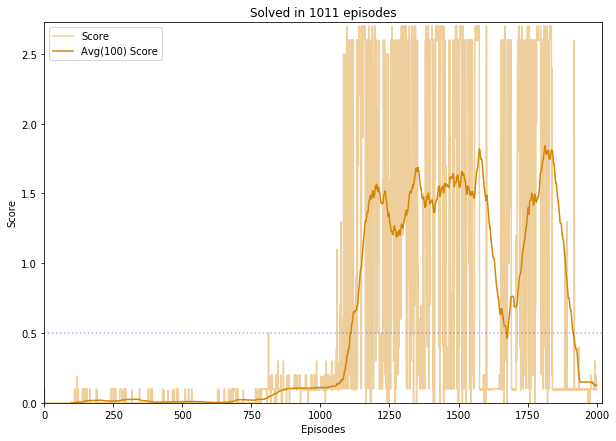

In [12]:
params={"buffer_size":int(1e5), "batch_size":128, "gamma":0.99, "tau":1e-3, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1, **params)
scores = train_maddpg(2000, noise_init=1.0, noise_decay=0.999, stop_when_solved=False)

- 1000 episodes with tau = 2e-1

Episode 100	Average Score: 0.04 - noise: 0.55
Episode 179	Average Score: 0.52	Score: 2.60
Environment solved in 79 episodes !!!
Episode 200	Average Score: 0.88 - noise: 0.30
Episode 300	Average Score: 1.51 - noise: 0.17
Episode 400	Average Score: 1.66 - noise: 0.09
Episode 500	Average Score: 1.03 - noise: 0.05
Episode 600	Average Score: 1.73 - noise: 0.03
Episode 700	Average Score: 1.68 - noise: 0.01
Episode 800	Average Score: 1.41 - noise: 0.01
Episode 900	Average Score: 1.76 - noise: 0.00
Episode 1000	Average Score: 1.06 - noise: 0.00


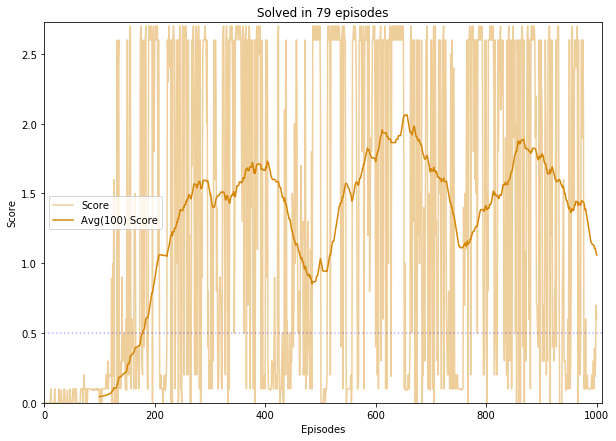

In [11]:
params={"buffer_size":int(1e5), "batch_size":512, "gamma":0.99, "tau":2e-1, "use_batch_norm":True,
       "lr_actor":1e-3, "lr_critic":5e-4, "weight_decay":0.0, "noise_theta":0.15, "noise_sigma":0.1}
agent = DDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1, **params)
scores = train_ddpg(1000, noise_init=1.0, noise_decay=0.994, stop_when_solved=False)

### Watch the match
In the next code cell, we load the trained weights from file to watch a smart agent playing against itself.


In [12]:
agent = DDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=2, use_batch_norm=True)

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
for t in range(400):
    actions = agent.act(states, noise=0)
    env_info = env.step(actions)[brain_name]  
    states = env_info.vector_observations
    dones = env_info.local_done                        # see if episode finished
      
    if np.any(dones):
        break 

